# CodeSoft : DataScience InternShip
# Task 03: Iris_Flower_Classification
# Author : Haroon Sajid

- The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

- Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

## 1.0 Importing Libraries

Pandas: Data manipulation and analysis library.
<br>Numpy: Numerical computing library.
<br>Matplotlib: Data visualization library.
<br>Seaborn: Statistical data visualization library.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2.0 Loading Dataset
In this section, We will import Iris Dataset

In [149]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3.0 Basic Structure

In [150]:
# Lets check the shape of data
df.shape

(150, 5)

In [151]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [152]:
# Lets See value_counts in every species
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [153]:
# Lets See unique values in dataset
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

## 4.0 Descriptive Statistics

In [154]:
# Lets See the statistics summary of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5.0  Identify Missing Values

In [155]:
# Lets See the missing values in dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We can see that, the Iris dataset is free of null values, ensuring complete and reliable data for analysis and modeling purposes.

## 6.0 Data Exploration(EDA)

In [156]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: title={'center': 'Species'}>

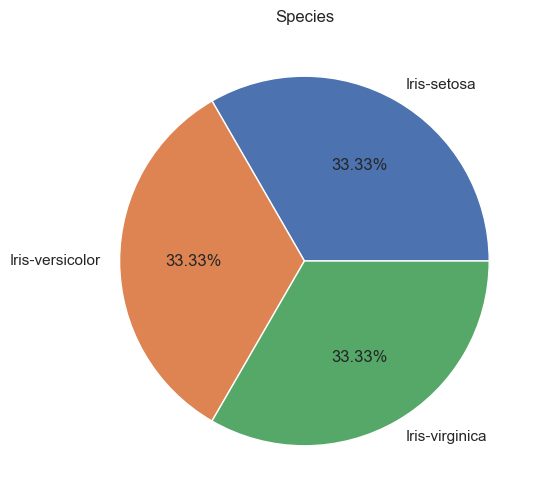

In [157]:
# Lets make pie chart on species
plt.figure(figsize=(17,6))
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

Figure_1: Shows the Species Distribution in dataset

<Axes: xlabel='species', ylabel='sepal_length'>

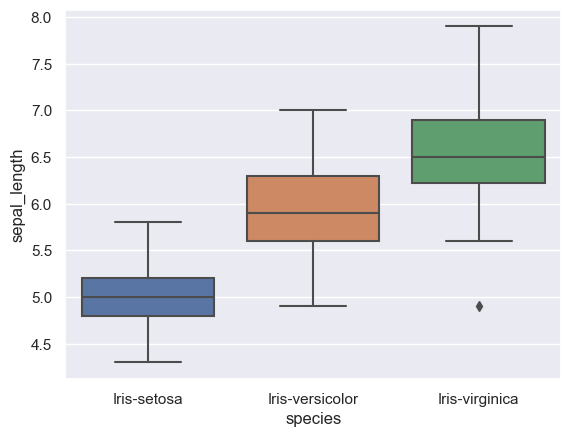

In [158]:
# Create a boxplot to visualize the distribution of sepal lengths for different species
sns.boxplot(data = df, x = 'species', y = 'sepal_length')

Figure_2: Boxplot Shows that, there is no outlier in dataset and not skewed

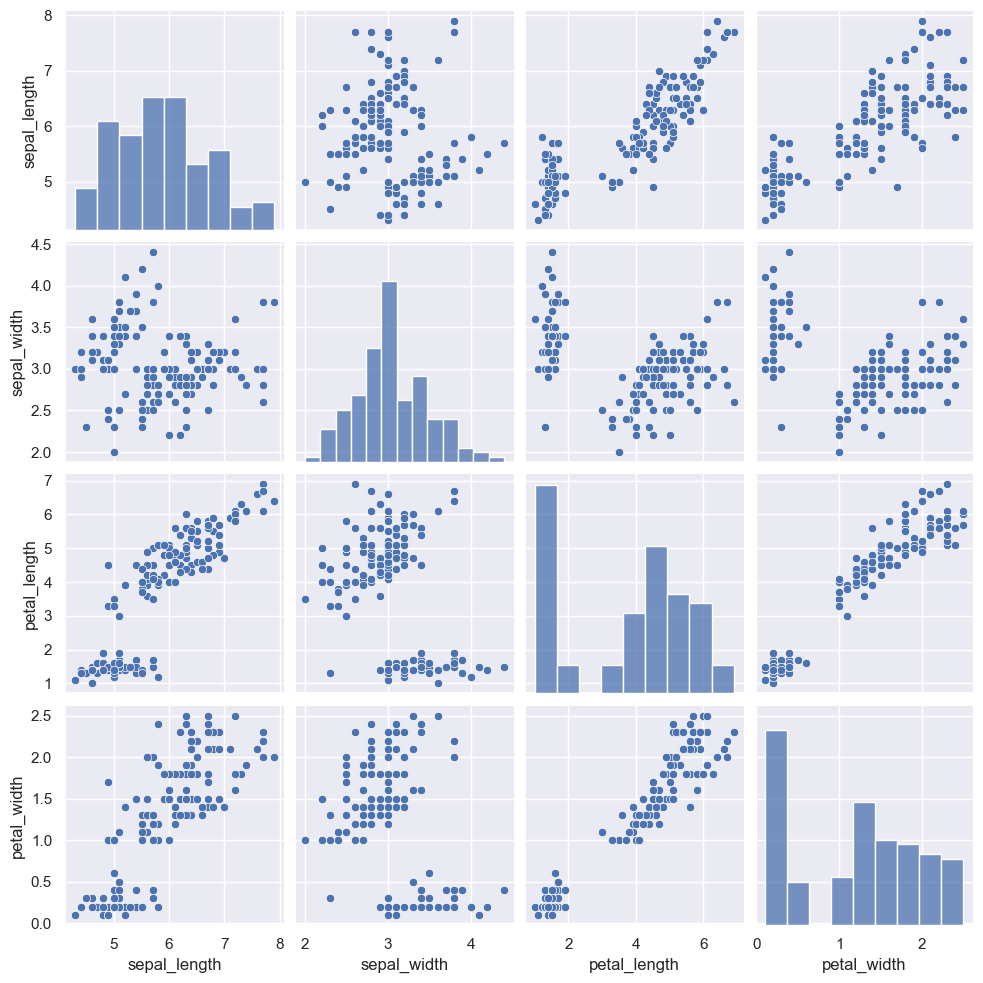

In [159]:
# Create a pairplot to visualize the pairwise relationships between numerical columns;
sns.pairplot(df)

Figure_3: Pairplot to Shows the pairwise relationships between numerical columns

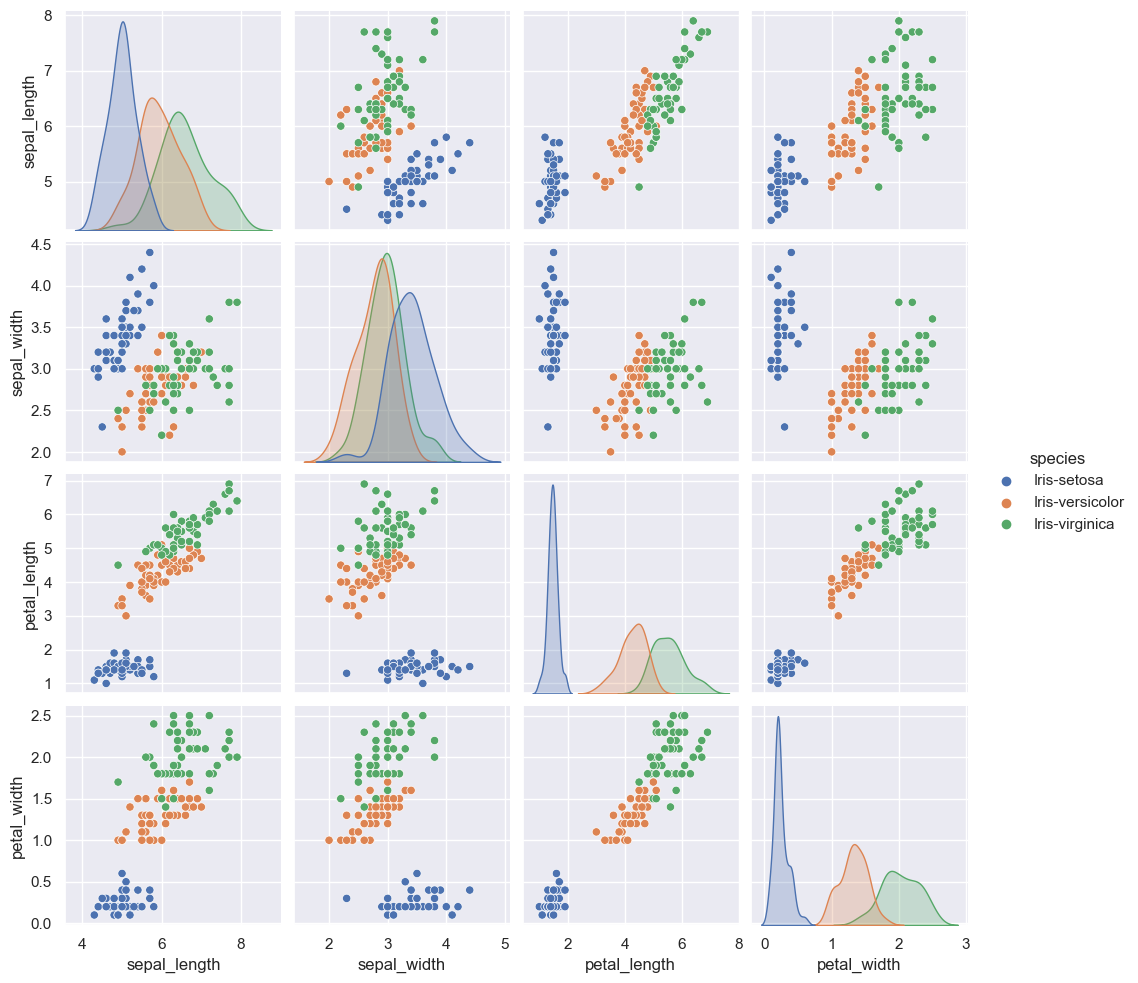

In [160]:
# Create a pairplot using the 'species' column to determine different colors for data points (hue). 
sns.pairplot(df, hue='species')

Figure_4: Pairplot to Shows the pairwise relationships between numerical columns in different colors for data points (hue)

C:\Users\Grace\AppData\Local\Temp\ipykernel_15484\414451786.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


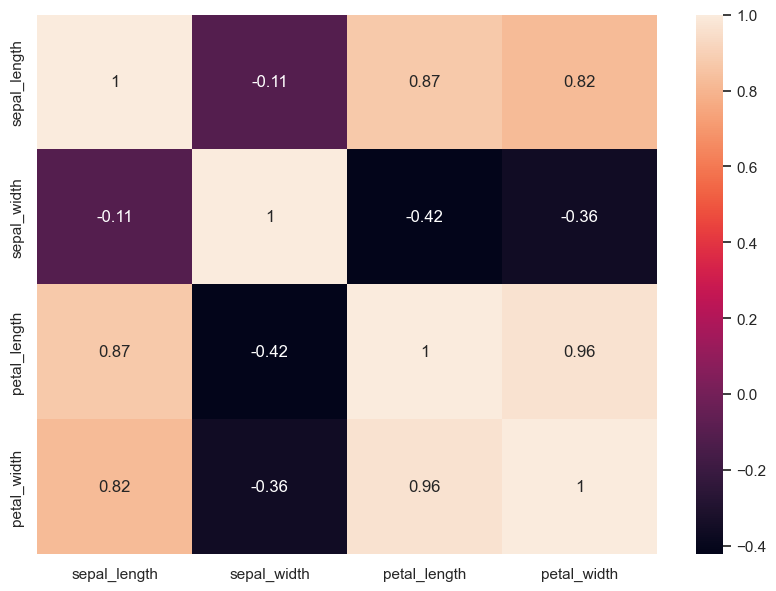

In [162]:
# Lets create heatmap of the correlation matrix of the DataFrame;
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

Figure_5: Heatmap Shows the correlation matrix of the DataFrame

### Observation 01

In exploratory data analysis (EDA) of the Iris dataset, I observed distinct clusters of data points for each of the three iris species using a pairplot. Additionally, a boxplot revealed variations in sepal and petal lengths among species, and a heatmap showed strong positive correlations between petal length and petal width, while sepal length and sepal width and  weaker correlations.

## 7.0 Model Building

In [247]:
# Import necessary libraries from scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 7.1 Create Independent and Dependent Variables

In [248]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df.drop(columns = ['species'])
y = df['species']

### 7.2 Data Preprocessing

In [249]:
# Lets do preprocessing on X dataset
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X = pd.DataFrame(df_scaled, columns=X.columns)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


### 7.3 Train Test Split Data

In [250]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.3, random_state= 30)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105,)
(45, 4) (45,)


### 7.4 Model Training & Performance

In [251]:
# Define the models
models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier()]
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']

for i in range(len(models)):
    # Train the model
    models[i].fit( xtrain, ytrain)
    
    # Make predictions on the test set
    pred = models[i].predict(xtest)
    
    # Calculate metrics
    accuracy = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred, average='macro')
    recall = recall_score(ytest, pred, average='macro')
    f1 = f1_score(ytest, pred, average='macro')
    
    # Print the metrics
    print("{} | Accuracy: {}, Precision: {}, Recall: {}, F1-Score: {}".format(model_names[i], accuracy, precision, recall, f1))


Logistic Regression | Accuracy: 0.9555555555555556, Precision: 0.9568151147098516, Recall: 0.9568151147098516, F1-Score: 0.9568151147098516
Decision Tree | Accuracy: 0.9777777777777777, Precision: 0.9833333333333334, Recall: 0.9743589743589745, F1-Score: 0.9781196581196582
K-Nearest Neighbors | Accuracy: 0.9555555555555556, Precision: 0.9568151147098516, Recall: 0.9568151147098516, F1-Score: 0.9568151147098516


## Conclusion

The **Decision Tree** model is the best according to the F1-score. It has an F1-score of approximately **0.978**, which indicates a balance between precision and recall. This model has demonstrated superior performance in predicting outcomes based on the given dataset.